In [11]:
#d = open('k_stop_w.txt','r',encoding='utf-8').read()
#d.split('\n')

In [2]:
import codecs
import pandas as pd
with codecs.open('ratings_test.txt',encoding='utf-8') as f:
    data = [i.split('\t') for i in f.read().splitlines()]
    m = data[0]
    data = data[1:]
#data
m

['id', 'document', 'label']

In [3]:
#str_data = ['안 녕 하 세 요1023'].str.replace('[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]','') # 가-힣 까지가 한글.
#w.replace('[^]')
#str_data

In [4]:
p_data = pd.DataFrame(data,columns=m)
p_data

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0
...,...,...,...
49995,4608761,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1
49996,5308387,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따 OOOO,0
49997,9072549,그림도 좋고 완성도도 높았지만... 보는 내내 불안하게 만든다,0
49998,5802125,절대 봐서는 안 될 영화.. 재미도 없고 기분만 잡치고.. 한 세트장에서 다 해먹네,0


1. 토큰화(이 데이터는 한줄이라 단어토큰화 하면된다.) (피처정리)
2. 데이터 전처리
3. 모델 생성 및 학습
4. 그래프 표현

In [5]:
from tensorflow.keras.preprocessing.text import Tokenizer # 토큰
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [6]:
X_data = p_data['document'].values
Y_data = p_data['label'].values
X_data,Y_data

(array(['굳 ㅋ', 'GDNTOPCLASSINTHECLUB',
        '뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아', ...,
        '그림도 좋고 완성도도 높았지만... 보는 내내 불안하게 만든다',
        '절대 봐서는 안 될 영화.. 재미도 없고 기분만 잡치고.. 한 세트장에서 다 해먹네', '마무리는 또 왜이래'],
       dtype=object),
 array(['1', '0', '0', ..., '0', '0', '0'], dtype=object))

In [7]:
from konlpy.tag import Okt
okt = Okt()
data_l = [''.join(okt.morphs(i)) for i in X_data]

In [8]:
tk = Tokenizer(num_words=5000)
tk.fit_on_texts(data_l)
X=tk.texts_to_matrix(data_l,mode='tfidf') # mode = [binary, count, tfidf]
Y=to_categorical(Y_data)
t_x,tt_x,t_y,tt_y=train_test_split(X,Y)
X.shape,Y.shape

((50000, 5000), (50000, 2))

In [9]:
m = Sequential()
m.add(Dense(256,input_shape=(5000,),activation='relu'))
m.add(Dropout(0.5))
m.add(Dense(128,activation='relu'))
m.add(Dropout(0.5))
m.add(Dense(2,activation='sigmoid'))
m.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
hy = m.fit(t_x,t_y,epochs=10,validation_data=(tt_x,tt_y))

Epoch 1/10
1172/1172 [==============================] - 9s 8ms/step - loss: 0.6637 - accuracy: 0.5428 - val_loss: 0.6421 - val_accuracy: 0.5602
Epoch 2/10
1172/1172 [==============================] - 8s 7ms/step - loss: 0.6091 - accuracy: 0.5829 - val_loss: 0.6435 - val_accuracy: 0.5643
Epoch 3/10
1172/1172 [==============================] - 8s 7ms/step - loss: 0.5920 - accuracy: 0.5892 - val_loss: 0.6465 - val_accuracy: 0.5618
Epoch 4/10
1172/1172 [==============================] - 8s 7ms/step - loss: 0.5873 - accuracy: 0.5875 - val_loss: 0.6484 - val_accuracy: 0.5606
Epoch 5/10
1172/1172 [==============================] - 8s 7ms/step - loss: 0.5827 - accuracy: 0.5920 - val_loss: 0.6559 - val_accuracy: 0.5654
Epoch 6/10
1172/1172 [==============================] - 8s 7ms/step - loss: 0.5808 - accuracy: 0.5939 - val_loss: 0.6522 - val_accuracy: 0.5604
Epoch 7/10
1172/1172 [==============================] - 8s 7ms/step - loss: 0.5810 - accuracy: 0.5930 - val_loss: 0.6600 - val_accuracy:

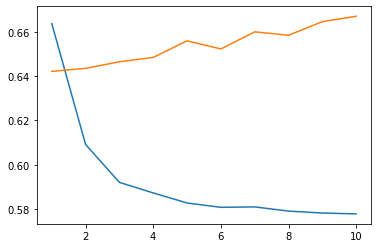

In [10]:
ec = range(1,len(hy.history['accuracy'])+1)
plt.plot(ec,hy.history['loss'])
plt.plot(ec,hy.history['val_loss'])